In [ ]:
### lets import all the necessary packages !

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bad_line is a list of strings split by the sep . If the function returns None , the bad line will be ignored. If the function returns a new list of strings with more elements than expected, a ParserWarning will be emitted while dropping extra elements. Only supported when engine="python"

In [101]:
comments=pd.read_csv(r'UScomments.csv', error_bad_lines=False)

C:\Users\somar\AppData\Local\Temp\ipykernel_30896\1918673461.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\somar\AppData\Local\Temp\ipykernel_30896\1918673461.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [102]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


checking for the null values

In [103]:
## lets find out missing values in your data

comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

dropping the null values

In [104]:
## drop missing values as we have very few & update datafraem as well..
comments.dropna(inplace=True)

# 1..how to perform SEntiment Analysis
In short , Sentiment analysis is all about analyszing sentiments of Users

In [105]:
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [106]:
#pip install textblob

In [107]:
from textblob import TextBlob

In [108]:
#TextBlob("trending 😉").sentiment.subjectivity
#TextBlob("trending 😉").sentiment.polarity
TextBlob("trending 😉").sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

In [109]:
df=comments[0:1000]

In [110]:
Polarity=[]

for col in comments['comment_text']:
    try:
        Polarity.append(TextBlob(col).sentiment.polarity)
    except:
        Polarity.append(0)

In [111]:
comments['Polarity']=Polarity

In [112]:
comments.shape

(691375, 5)

In [113]:
comments.head(3)

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0


# ## 2.. Wordcloud Analysis of your data

In [114]:
### Lets perform EDA for the Positve sentences and negative

In [115]:
comments_positive= comments[comments['Polarity']==1]



In [116]:
comments_negative = comments[comments['Polarity']==-1]


In [117]:
#pip install wordcloud

In [118]:
from wordcloud import WordCloud,STOPWORDS

In [119]:
comments_positive['comment_text']

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [120]:
totaltext=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

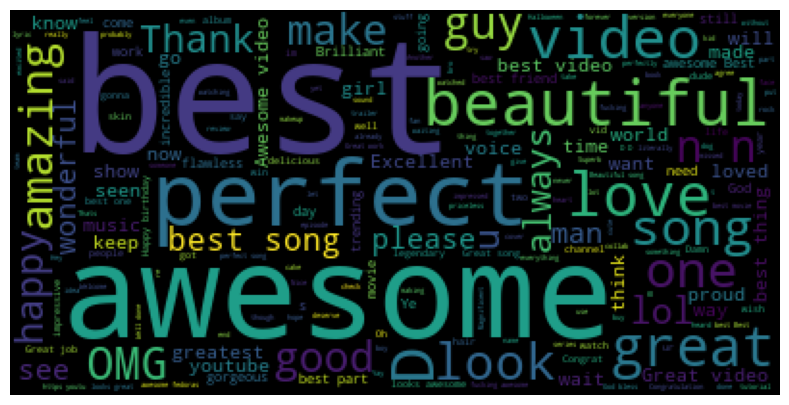

In [121]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(totaltext)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [122]:
totaltext=' '.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

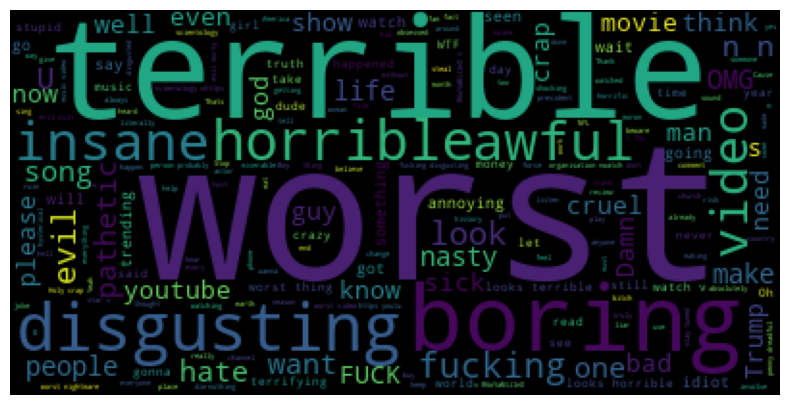

In [123]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(totaltext)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [124]:
### Conclusion-->> Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..
### Conclusion-->> Users are emphasizing more on best,awesome,love ,beautiful etc..

### Try it :

    a) perform sentiment analysis using NLTK Vader SentimentAnalyzer..
    b) perform sentiment analysis using spacy..

### Try it : 
    a..Extract positive comments using query() function of pandas..
    b..Extract positive comments using where() function of numpy

# 3..Perform Emoji's Analysis

In [125]:
#pip install emoji==2.0.0

In [126]:
import emoji

For every emoji theNote-->> Every emoji has a Unicode associated with it
 '\U0001F600' is a unicode for 😀

 Unicode-->>The Unicode Standard provides a unique number for every characte ,ie 
           Unicode is a universal character encoding standard that assigns a code to every character and symbol in every languagere will be a unicode

In [127]:
print('\U0001F610')

😐


In [128]:
### lets extract emoji from below comment

In [129]:
comment="trending 😉"

In [130]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [131]:
emoji_list = []
for i in comments['comment_text']:
    for char in i:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [132]:
len(emoji_list)

294549

In [133]:
emoji_list[0:7]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻']

In [134]:
### NOw we have to compute frequencies of each & every emojis..

In [135]:
from collections import Counter

In [136]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [137]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [138]:
frequency = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [139]:
#!pip install plotly

In [140]:
import plotly.graph_objs as go


In [141]:
from plotly.offline import iplot

In [142]:
trace=go.Bar(x=emojis,y=frequency)

In [143]:
iplot([trace])

### Try it :
    Once u have list of emojis , how to create a dictionary like : {'emoji':'frequency of emoji'}
        
    1..code completely from scratch..
       (by iterating over the list and counting frequency)

    2..using list in-built count function
    3..using dictionary in-buult get function

## 4..Collect Entire data of Youtube !

In [144]:
import os

In [145]:
path=r'C:\Users\somar\OneDrive - Technological University of the Shannon Midwest\data anaytics projects\YOUTUBEANAYLSIS\additional_data'

In [146]:
files = os.listdir(path)

In [147]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [148]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [149]:
files_csv=[files[i] for i in range(0,len(files),2)]

In [150]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [151]:
files_csv[0].split('.')[0][0:2]

'CA'

In [152]:
full_df=pd.DataFrame()
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file,encoding='iso=8859-1',error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])
    

C:\Users\somar\AppData\Local\Temp\ipykernel_30896\4056751761.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\somar\AppData\Local\Temp\ipykernel_30896\4056751761.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\somar\AppData\Local\Temp\ipykernel_30896\4056751761.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\somar\AppData\Local\Temp\ipykernel_30896\4056751761.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\somar\AppData\Local\Temp\ipykernel_30896\4056751761.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [153]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [154]:
full_df.shape

(375942, 17)

### Try it :
    a) collect data using while loop 
    a) Collect data using glob 

## 5.. Which Category has the maximum likes ?

In [160]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [161]:
cat=pd.read_csv('category_file.txt',sep=':')

In [162]:
cat.reset_index(inplace=True)

In [163]:
cat.columns=['category_id','Category_name']

In [164]:
cat.set_index('category_id',inplace=True)

In [165]:
cat

,Category_name
category_id,
1,\t\tFilm & Animation
2,\t\tAutos & Vehicles
10,\t\tMusic
15,\t\tPets & Animals
17,\t\tSports
18,\t\tShort Movies
19,\t\tTravel & Events
20,\t\tGaming
21,\t\tVideoblogging


In [169]:
cat['Category_name'] = cat['Category_name'].str[3:]



In [171]:
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [173]:
cat.to_dict()

{'Category_name': {1: 'Film & Animation',
  2: 'Autos & Vehicles',
  10: 'Music',
  15: 'Pets & Animals',
  17: 'Sports',
  18: 'Short Movies',
  19: 'Travel & Events',
  20: 'Gaming',
  21: 'Videoblogging',
  22: 'People & Blogs',
  23: 'Comedy',
  24: 'Entertainment',
  25: 'News & Politics',
  26: 'Howto & Style',
  27: 'Education',
  28: 'Science & Technology',
  29: 'Nonprofits & Activism',
  30: 'Movies',
  31: 'Anime/Animation',
  32: 'Action/Adventure',
  33: 'Classics',
  34: 'Comedy',
  35: 'Documentary',
  36: 'Drama',
  37: 'Family',
  38: 'Foreign',
  39: 'Horror',
  40: 'Sci-Fi/Fantasy',
  41: 'Thriller',
  42: 'Shorts',
  43: 'Shows',
  44: 'Trailers            '}}

In [174]:
dct=cat.to_dict()

In [175]:
dct['Category_name']

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers            '}

In [176]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [177]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [178]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

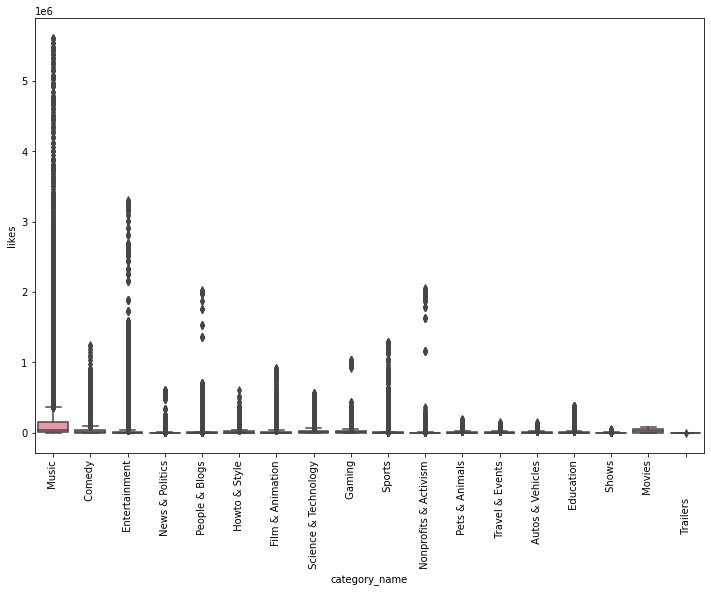

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

### Try it :
    a)How to extract category from json file ( US_category_id.json)

## 6.. Find out whether audience is engaged or not

In [179]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [180]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [181]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers            ')])

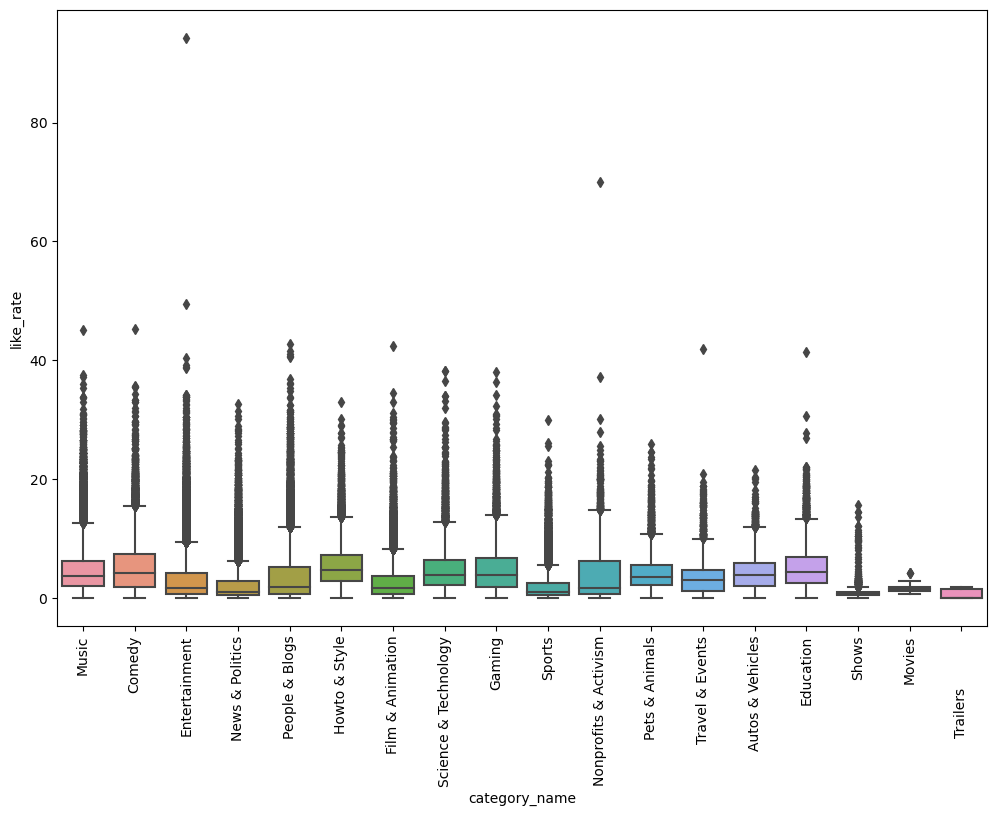

In [182]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

In [183]:
### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

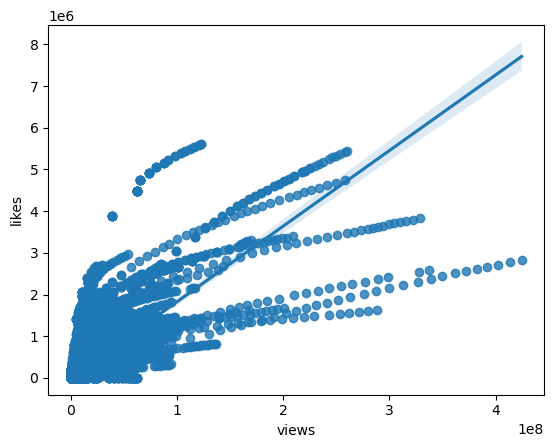

In [184]:
sns.regplot(data=full_df,x='views',y='likes')

In [185]:
### finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

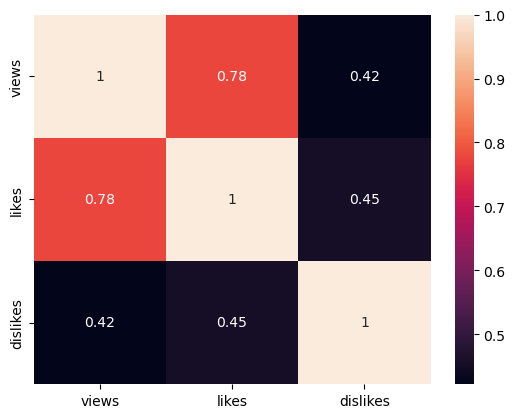

In [186]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [187]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


### Try it :
    Create scatterplot between 'views' & 'likes'

## 7..Which channels have the largest number of trending videos?

In [188]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [189]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [190]:
import plotly.express as px

In [191]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

### Try it :
    Create Above Bar chart using Pandas , Matplotlib , Bokeh , seaborn !

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [192]:
import string

In [193]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [194]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [195]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [196]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [197]:
punc_count(text)

4

In [198]:
sample=full_df[0:10000]

In [199]:
sample['count_punc'] = sample['title'].apply(punc_count)

C:\Users\somar\AppData\Local\Temp\ipykernel_30896\1766437736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752,3


<AxesSubplot:xlabel='count_punc', ylabel='views'>

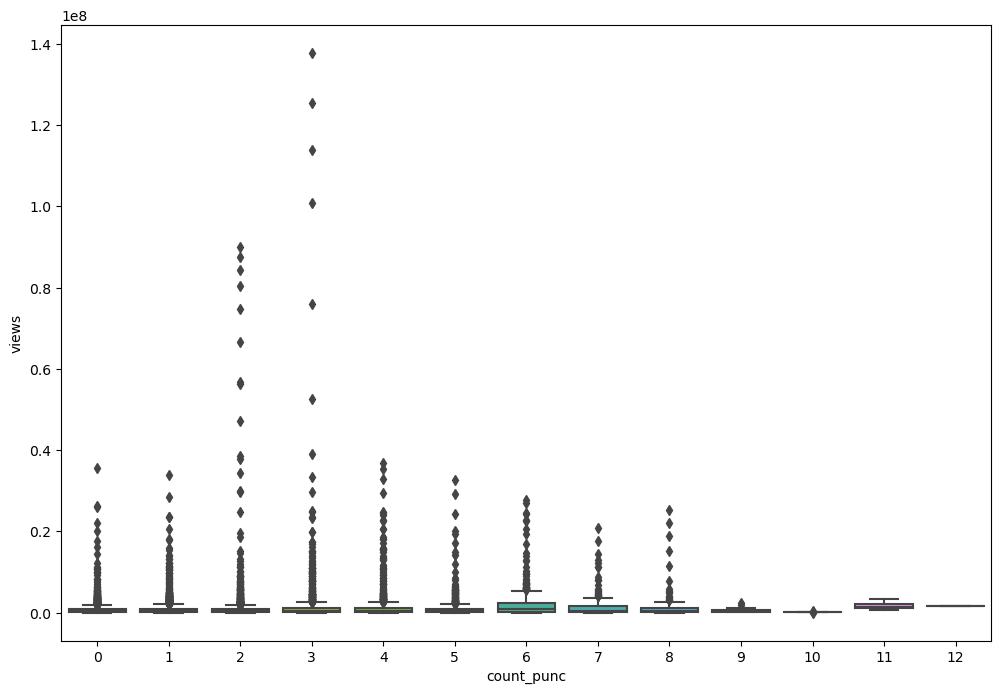

In [201]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [ ]:
sample['count_punc'].corr(sample['views'])

0.06510009783044877

### Try it:
    How to remove punctuation from data using Regular Expressions